In [1]:
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
path = r'T:\MPO\RTP\FY20 2045 Update\Data and Resources'

In [3]:
sidewalks_EUG_SPR = gpd.read_file(os.path.join(path, 'PerformanceAnalysis', 
                                               'sidewalk_bikeway_trails', 'Sidewalks_EUG_SPR.shp')) 

In [4]:
sidewalks_COB = gpd.read_file(os.path.join(path, 'Data', 'Coburg', 'Coburg_sidewalksCOB.shp'))

In [5]:
sidewalks_EUG_SPR.head()

,OBJECTID,Length,geometry
0,1,151,"LINESTRING Z (4226331.689 893353.069 0.000, 42..."
1,2,53,"LINESTRING Z (4226455.939 893192.738 0.000, 42..."
2,3,52,"LINESTRING Z (4226404.210 893194.363 0.000, 42..."
3,4,52,"LINESTRING Z (4226352.186 893197.835 0.000, 42..."
4,5,52,"LINESTRING Z (4226252.842 893218.949 0.000, 42..."


In [6]:
sidewalks_COB.head()

,Id,geometry
0,1606,"LINESTRING (4247692.584 911417.878, 4247677.46..."
1,1609,"LINESTRING (4247397.710 911318.253, 4247543.33..."
2,1767,"LINESTRING (4248497.585 909979.628, 4248995.71..."
3,1774,"LINESTRING (4247897.585 909829.441, 4247806.96..."
4,1781,"LINESTRING (4247215.085 909713.004, 4247218.33..."


In [7]:
sidewalks_EUG_SPR.rename(columns = {'OBJECTID': 'Id'}, inplace = True)

In [8]:
sidewalks = sidewalks_EUG_SPR[['Id', 'geometry']].append(sidewalks_COB[['Id', 'geometry']])

In [9]:
sidewalks = sidewalks.to_crs(epsg = 3857)

In [10]:
sidewalks.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

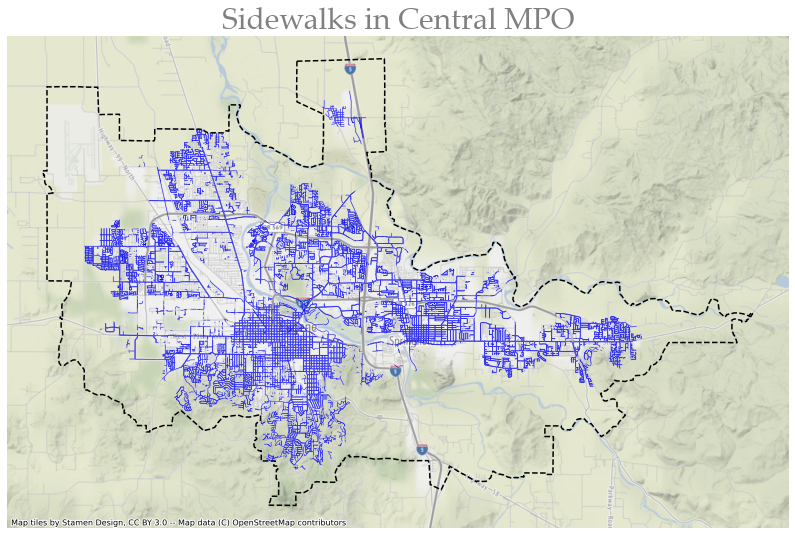

In [12]:
fig, ax = plt.subplots(figsize=(14, 12))
sidewalks.plot(ax=ax, color='blue', linewidth = 0.5, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("Sidewalks in Central MPO", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [13]:
sidewalks['Id'] = list(range(1,  sidewalks.shape[0]+1, 1))

In [14]:
sidewalks.to_file(os.path.join(path, 'PerformanceAnalysis','sidewalk_bikeway_trails', 'Sidewalks_MPO.shp'))